# Pokemon Battle Predictor

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [193]:
pokemon = pd.read_csv('data/pokemon.csv')
combats = pd.read_csv('data/combats.csv')
tests = pd.read_csv('data/tests.csv')

In [194]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [195]:
combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


<AxesSubplot:>

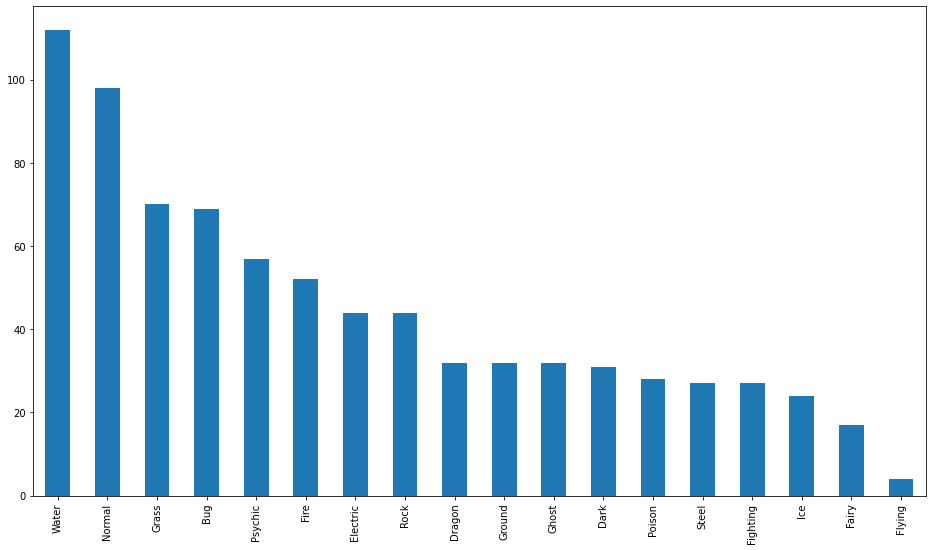

In [196]:
pokemon['Type 1'].value_counts().plot(kind = 'bar', figsize=(16,9))

In [197]:
pokemon['Type 2'].isna().sum()

386

A lot of missing values, let us fill it with another object 'NA'

In [198]:
pokemon['Type 2'].fillna('NA', inplace=True)
pokemon['Name'].fillna('NA', inplace= True)

In [199]:
pokemon['Type 2'].isna().sum()

0

great!

In [200]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


No missing data now! 
Now to predict, all the parameters should be in integer format  
But features are in object format -  
- `Name`
- `Type 1`
- `Type 2`   
Also, The variable `Name` is not a feature, so we dont need it, and same goes for `#`(index col)
so we just encode the `Type 1` and `Type 2` columns!

In [201]:
pokemon = pd.get_dummies(pokemon, prefix=['Type 1', 'Type 2'], columns= ['Type 1', 'Type 2'])

Awesome, now i want to create a dataframe which will contain the stats of each pokemon, corresponding to `Combats.csv` and train the model on that!

In [202]:
combats.head(5)

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [203]:
pd.concat([pokemon.loc[pokemon['#'] == 266].reset_index(drop=True), pokemon.loc[pokemon['#'] == 298].reset_index(drop=True)], axis = 1).info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 94 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   #                1 non-null      int64 
 1   Name             1 non-null      object
 2   HP               1 non-null      int64 
 3   Attack           1 non-null      int64 
 4   Defense          1 non-null      int64 
 5   Sp. Atk          1 non-null      int64 
 6   Sp. Def          1 non-null      int64 
 7   Speed            1 non-null      int64 
 8   Generation       1 non-null      int64 
 9   Legendary        1 non-null      bool  
 10  Type 1_Bug       1 non-null      uint8 
 11  Type 1_Dark      1 non-null      uint8 
 12  Type 1_Dragon    1 non-null      uint8 
 13  Type 1_Electric  1 non-null      uint8 
 14  Type 1_Fairy     1 non-null      uint8 
 15  Type 1_Fighting  1 non-null      uint8 
 16  Type 1_Fire      1 non-null      uint8 
 17  Type 1_Flying    1 non-null      uint8 

In [204]:
pokemon['Legendary'].replace({
    True : 1,
    False: 0
}, inplace= True)

In [205]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   10000 non-null  int64
 1   Second_pokemon  10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB


In [206]:
pd.concat([combats.reset_index(drop= True), tests.reset_index(drop=True)])

,First_pokemon,Second_pokemon,Winner
0,266,298,298.0
1,702,701,701.0
2,191,668,668.0
3,237,683,683.0
4,151,231,151.0
...,...,...,...
9995,216,498,NaN
9996,113,404,NaN
9997,493,104,NaN
9998,643,259,NaN


**NOTE**    
`winner == 0` means first pokemon wins

`winner == 1` means second pokemon wins

In [207]:
df = []
for i in range(0, 10000):
    first_pokemon_stats = pokemon.loc[pokemon['#'] == combats.iloc[i]['First_pokemon']].drop(['Name','#'], axis = 1).values[0]
    second_pokemon_stats = pokemon.loc[pokemon['#'] == combats.iloc[i]['Second_pokemon']].drop(['Name','#'], axis = 1).values[0]
    winner = np.array([0])
    if combats.iloc[i]['Winner'] == combats.iloc[i]['Second_pokemon']:
        winner = np.array([1])
    df.append(np.concatenate((first_pokemon_stats, second_pokemon_stats, winner)))

In [208]:
df = pd.DataFrame(df)

In [209]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
Y = df.iloc[:, df.columns == 90]
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size= 0.3, random_state = 100)

In [210]:
from sklearn.linear_model import LogisticRegression

predictor = LogisticRegression()
predictor.fit(x_train, y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [211]:
y_pred = predictor.predict(x_test)

In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred) )

Accuracy: 88.33%
Precision:  0.8928128872366791
Recall 0.8906056860321384
F1 score 0.8917079207920793


In [218]:
def predict_battle_result(pkmn0, pkmn1):
    pkmn0_stats = pokemon.loc[pokemon['Name'] == pkmn0].drop(['Name','#'], axis = 1).values[0]
    pkmn1_stats = pokemon.loc[pokemon['Name'] == pkmn1].drop(['Name','#'], axis = 1).values[0]
    input = np.concatenate((pkmn0_stats, pkmn1_stats))

    if predictor.predict(example_input.reshape(1,-1))[0] == 0:
        print(f'{pkmn0} will beat {pkmn1}!')
    else:
        print(f'{pkmn1} will beat {pkmn0}')

In [219]:
predict_battle_result("Pikachu", "Dragonite")

Dragonite will beat Pikachu
